# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

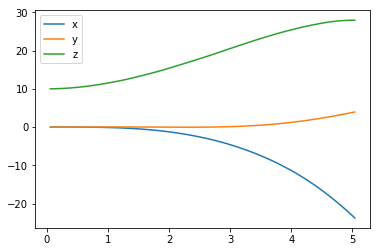

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

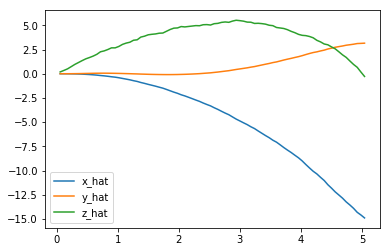

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

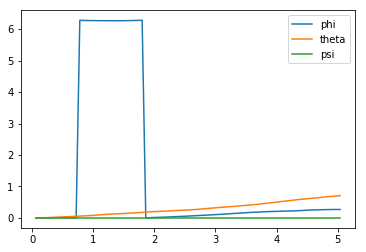

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

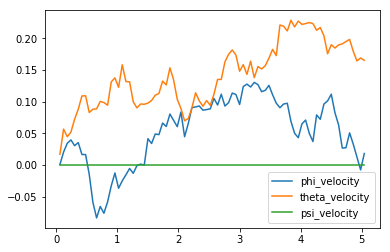

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

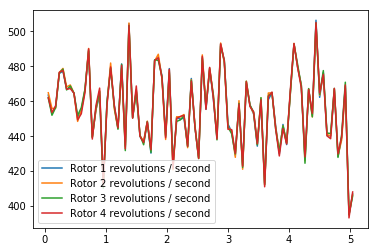

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-23.74785198   3.94395674  27.92697868   0.26788272   0.70861573
   0.        ]
[-14.89438935   3.15698378  -0.28084144]
[0.01823782 0.16516556 0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score = 26656.960 (best = 26717.888), noise_scale = 3.25

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [68]:
## TODO: Train your agent here.
# https://gist.github.com/deehzee/86ad60d3d2e375013ec710234f88968c
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

import numpy as np
from task import Task
from ddpg import DDPG

runtime = 10
init_pose = np.array([0., 0., 0., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
target_pos = np.array([100., 100., 100.])

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime, target_pos=target_pos)
agent = DDPG(task)

num_episodes = 300
best_total_reward = -np.inf
best_stat = None
rewards = []
best_results = None

labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']

# Run the simulation, and save the results.
for i_episode in range(1, num_episodes+1):
    
    done = False
    state = agent.reset_episode()    
    total_reward = 0.0
    
    results_episode = {x : [] for x in labels}
        
    while True:
        action = agent.act(state)
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        total_reward += reward

        result = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)
        
        for ii in range(len(labels)):
            results_episode[labels[ii]].append(result[ii])

        if done:
            rewards.append(total_reward)
            
            if total_reward >= best_total_reward:
                best_total_reward = total_reward
                best_results = results_episode 
            
            break
            
    print('Episode %d; reward %.2f; final pos: %d %d %d' %(i_episode, total_reward, results_episode['x'][-1], results_episode['y'][-1], results_episode['z'][-1]))
    
print('Completed')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Episode 1; reward 5400.00; final pos: 0 0 0
Episode 2; reward 21281.53; final pos: 0 2 0
Episode 3; reward 5400.00; final pos: 0 0 0
Episode 4; reward 4500.00; final pos: 0 0 0
Episode 5; reward 4500.00; final pos: 0 0 0
Episode 6; reward 5400.00; final pos: 0 0 0
Episode 7; reward 4500.00; final pos: 0 0 0
Episode 8; reward 4500.00; final pos: 0 0 0
Episode 9; reward 2700.00; final pos: 0 0 0
Episode 10; reward 2700.00; final pos: 0 0 0
Episode 11; reward 4500.00; final pos: 0 0 0
Episode 12; reward 935669.73; final pos: 35 150 199
Episode 13; reward 997311.00; final pos: -107 18 117
Episode 14; reward 662185.70; final pos: -2 150 300
Episode 15; reward 476923.17; final pos: 150 -150 300
Episode 16; reward 1037710.82; final pos: 33 98 300
Episode 17; reward 444510.26; final pos: 119 -150 148
Episode 18; reward 689557.31; final pos: -28 -17 300
Episode 19; reward 503217.69; final pos: 27 -150 76
Epi

Episode 156; reward 367871.00; final pos: -118 -150 144
Episode 157; reward 606221.61; final pos: -13 -150 197
Episode 158; reward 1092159.91; final pos: 65 5 300
Episode 159; reward 821121.50; final pos: -106 -31 200
Episode 160; reward 402947.51; final pos: -150 -30 69
Episode 161; reward 1662077.53; final pos: 94 30 254
Episode 162; reward 748859.49; final pos: 26 -138 166
Episode 163; reward 865224.12; final pos: -115 94 216
Episode 164; reward 907401.89; final pos: 43 134 300
Episode 165; reward 922265.78; final pos: 95 86 300
Episode 166; reward 1119430.93; final pos: -41 2 259
Episode 167; reward 863563.25; final pos: -20 -132 56
Episode 168; reward 440359.63; final pos: -150 -20 100
Episode 169; reward 1369103.57; final pos: 96 43 300
Episode 170; reward 512169.96; final pos: 18 -124 0
Episode 171; reward 901422.23; final pos: 2 57 300
Episode 172; reward 434316.55; final pos: 17 -150 50
Episode 173; reward 752503.71; final pos: 32 49 300
Episode 174; reward 487024.11; final po

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

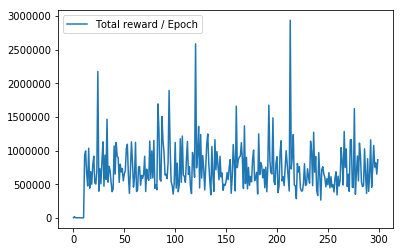

In [69]:
## TODO: Plot the rewards.
plt.plot(rewards, label='Total reward / Epoch')
plt.legend()

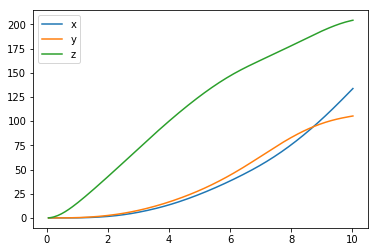

In [70]:
plt.plot(best_results['time'], best_results['x'], label='x')
plt.plot(best_results['time'], best_results['y'], label='y')
plt.plot(best_results['time'], best_results['z'], label='z')
plt.legend()

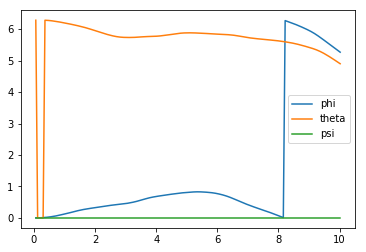

In [102]:
plt.plot(best_results['time'], best_results['phi'], label='phi')
plt.plot(best_results['time'], best_results['theta'], label='theta')
plt.plot(best_results['time'], best_results['psi'], label='psi')
plt.legend()

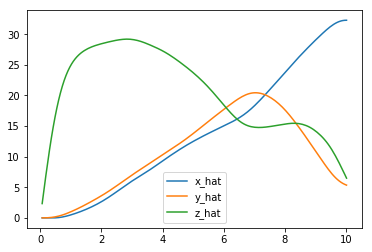

In [103]:
plt.plot(best_results['time'], best_results['x_velocity'], label='x_hat')
plt.plot(best_results['time'], best_results['y_velocity'], label='y_hat')
plt.plot(best_results['time'], best_results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

6088.15
653489.04
843468.92
681976.85
796966.03
763218.61
642263.53
767814.26
912256.41
754502.29
745833.02
721361.39
1000574.28
805690.66
665896.22
670115.00
941045.61
676422.28
706127.21
837489.40
726520.03
890709.93
582083.29
774802.77
601548.03
520872.86
756594.98
785972.92
699210.52
756321.88


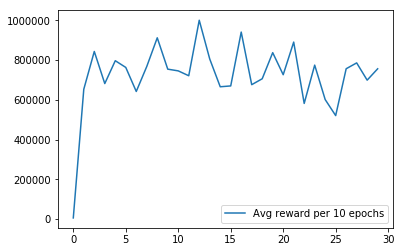

In [100]:
jump = 10
initial = 0
count = jump
avg = []

while initial < 300:
    avg.append(np.array(rewards[initial:count]).mean())
    print('%.2f' % np.array(rewards[initial:count]).mean())
    
    initial += jump
    count += jump

plt.plot(avg, label='Avg reward per %d epochs' % jump)
plt.legend()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:
The task was simply to fly from position (0, 0, 0) to position (100,100,100) and hover at that point. The reward function underwent many revisions to reach a satisfactory result, including various additions such as penalties for excessive velocities and approaching the borders of the environment. After trialing many different combinations of calculating rewards and penalties, the final version of the reward function ended up like so: 

* 300/timeslice: this is simply to reward the sim for staying in the air and not crashing; 
* If the sim is greater than 173 units away from the target, then grant no additional reward to signal it's too far away;
* If the sim is between 10 and 173 units away from the target, then grant 10 additional points for every unit it is closer to the point to encourage the sim to move close to the target;
* If the sim is less than 10 units away, then grant a flat 17300 point to encourage the sim to stay there.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

I used the provided DDPG agent, critic, and actor with some alterations. For the agent, I lowered the discount factor to 0.6 (making it a bit more myopic than the 0.99 version), and increased the tau parameter to 0.05. I played around with the replay buffer's sizes (batch and buffer size), but did not discern an overall difference. Of these changes, the discount factor seemed to have the biggest impact, which makes sense since that parameter controls how myopic vs farsighted the model becomes.

For the actor, I settled on a network of three layers of 256/128/64 with relu activation and a dropout of 0.4. I tried tanh and sigmoid activations, as well as additional layers and batch normalization, but found the effects of these to be deleterious to the network's performance. I did adjust the Adam optimizer to have an lr of 0.01.

For the critic, I settled on a similar setup for the critic's dual networks (with the addition of the final node for Q values). Again, I experimented with additional layers, activation, batch normalizations, but did not find the results satisfactory.

However, with all these changes, I think the reward function was the largest factor to the model's behaviour.

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

After all the revisions I did to the reward function, I would say this was definitely a challenging task for the agent to learn. However, we can see from the position plot of the best run that the model was seemingly grasping (albeit roughly) that there was a general direction with which the score was increasing and that it was trying to reach the point. With reference to the reward plot, the learning does appear to be more of an aha moment than just a gradual learning curve, but then the performance seems to level off. Overall, the last ten epochs averaged 756321.88 vs the first ten epochs averaging 6088.15, showing signs of improvement.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

Getting the satisfactory results by designing an appropriare reward function was the hardest (and sometimes frustrating!) part of this project, which was compounded by the long training times. The model would sometimes exhibit quite odd behaviour, such as performing well before collapsing in performance and it took many iterations to overcome this. I'm still not entirely happy with the overall result, particularly that the model seems to overshoot on the z-axis quite frequently, thereby causing termination of the episode by violating the environment's boundaries, but it seems this is a difficult task to master.